# MNIST for Classification

## Imports

In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Fetching The Dataset

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Preprocessing

In [17]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [18]:
print(mnist['details'])

{'id': '554', 'name': 'mnist_784', 'version': '1', 'description_version': '2', 'format': 'ARFF', 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'], 'upload_date': '2014-09-29T03:28:38', 'language': 'English', 'licence': 'Public', 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff', 'parquet_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq', 'file_id': '52667', 'default_target_attribute': 'class', 'tag': ['Artificial Intelligence', 'AzurePilot', 'Computer Vision', 'Data Sets', 'Kaggle', 'Machine Learning', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 'visibility': 'public', 'minio_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq', 'status': 'active', 'processing_date': '2020-11-20 20:12:09', 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}


In [28]:
X, y = mnist['data'], mnist['target']

In [29]:
X.shape

(70000, 784)

In [30]:
y.shape

(70000,)

In [38]:
X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

5


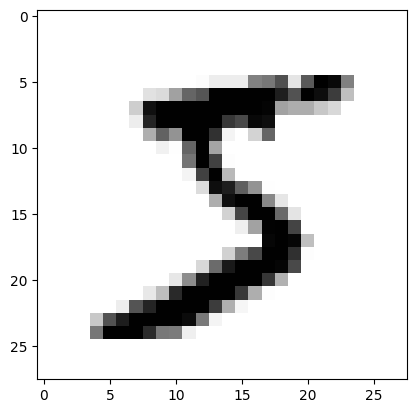

In [43]:
# displaying some of the data
some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')

print(y[0])

In [44]:
type(y[0])

str

In [45]:
y = y.astype(np.uint8)

In [46]:
type(y[0])

numpy.uint8

In [47]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a "5-detector"
This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5.

In [48]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [49]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [50]:
sgd_clf.predict([some_digit])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

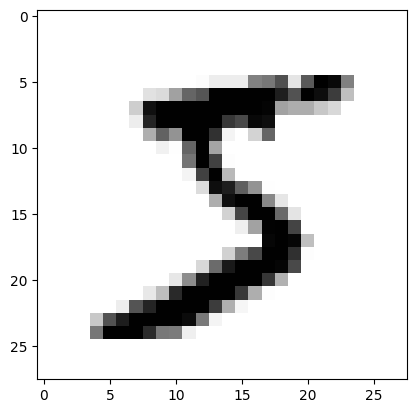

In [54]:
plt.imshow(some_digit_image, cmap='binary')

## Measuring Accuracy Using Cross-Validation